# SPAM MESSAGES – MACHINE LEARNING

IMPORT

# COUNT VALID WORDS

In [157]:

!git init
!git add "Spam ML.ipynb
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/jacksteel5314/SpamDetectionML.git
!git push -u origin main

Reinitialized existing Git repository in /Users/jacksteel/Documents/Documents - Jack’s MacBook Pro/SpamML/.git/
fatal: pathspec 'Spam' did not match any files
On branch main

Initial commit

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	Spam ML.ipynb
	spam.csv

nothing added to commit but untracked files present (use "git add" to track)
error: remote origin already exists.
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/jacksteel5314/SpamDetectionML.git'


In [134]:
#Imports 
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math
import copy
import re
from collections import Counter 
%matplotlib inline

READ IN DATA

In [135]:
df = pd.read_csv("spam.csv", encoding='cp1252')
print("Number of Observations: ", len(df))
print("Number of Columns: ", len(df.columns))
df.head()

Number of Observations:  5572
Number of Columns:  5


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


CLEANING THE DATA

In [136]:
spam_df = df[["v1", "v2"]]
print("Number of Observations: ", len(df))
print("Number of Columns: ", len(spam_df.columns))
spam_df["Spam?"] = np.where(spam_df["v1"] == "spam", 1, 0)
spam_df = spam_df[["Spam?", "v2"]]
spam_df.rename(columns = {"v2": "Message"}, inplace=True)
spam_df.head()

Number of Observations:  5572
Number of Columns:  2


/var/folders/t9/jkdln0dj4z1d48j56btqnp780000gn/T/ipykernel_80634/3345441496.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_df["Spam?"] = np.where(spam_df["v1"] == "spam", 1, 0)


,Spam?,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


ADDING VARIABLES

Most Frequent Words in Spam / Ham

In [137]:
# Spam Most Common Words
spam_only = spam_df[spam_df["Spam?"] == 1]
spam_words = ""
for message in spam_only["Message"]:
    spam_words = spam_words.lower() + " " + message
spam_word_array = spam_words.split(" ")
spam_most_common = Counter(spam_word_array).most_common(30)
spam_words_df = pd.DataFrame(spam_most_common, columns = ["Word", "Count"])
  
# Ham Most Common Words 
ham_only = spam_df[spam_df["Spam?"] == 0]
ham_words = ""
for message in ham_only["Message"]:
    ham_words = ham_words.lower() + " " + message
ham_word_array = ham_words.split(" ")
ham_most_common = Counter(ham_word_array).most_common(30)
ham_words_df = pd.DataFrame(ham_most_common, columns = ["Word", "Count"])

Graph Thirty Most Frequent Words in Spam Messages

<AxesSubplot:xlabel='Count', ylabel='Word'>

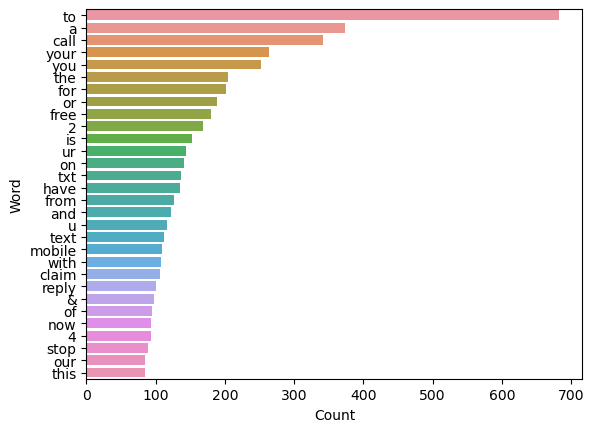

In [138]:
sns.barplot(data=spam_words_df, x="Count", y="Word")

Graph Thirty Most Frequent Words in Ham Messages

<AxesSubplot:xlabel='Count', ylabel='Word'>

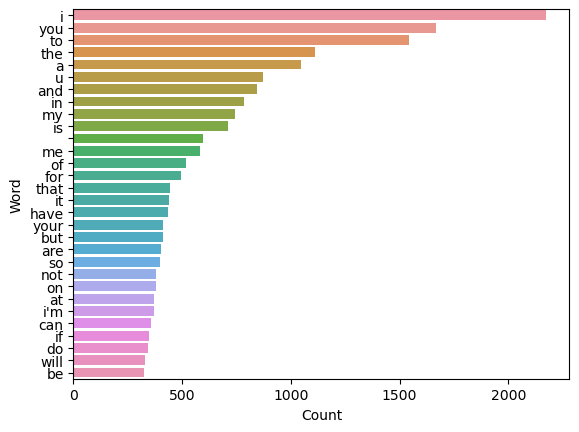

In [139]:
sns.barplot(data=ham_words_df, x="Count", y="Word")

Adding Variables

In [140]:
spam_df["num_phone_related"] = spam_df["Message"].str.lower().str.count("msg|sms|message|mobile|phone|call|txt|text|texting|send") 
spam_df["num_winner"] = spam_df["Message"].str.lower().str.count("winner|congratulations|prize|jackpot|claim|vacation|cash|free") 
spam_df["num_of_website"] = spam_df["Message"].str.lower().str.count("http|www") 
spam_df["num_rand_letters"] = spam_df["Message"].str.count("!|@|#|$|%|^|&|>|<|/+|=") - 2
spam_df["length_of_mess"] = [len(mess) for mess in spam_df["Message"]]
spam_df["spam_word_count"] = spam_df["Message"].str.count("to|a|call|your|you|the|for|or|free|2|is|ur|on|txt|have|from|and|u|text|mobile|with|claim|reply|&|of|now|4|stop|our|this")
spam_df["ham_word_count"] = spam_df["Message"].str.count("i|you|to|the|a|u|and|in|my|is|me|of|for|that|it|have|your|but|are|so|not|on|at|i'm|can|if|do|will|be")
spam_df[:20]


,Spam?,Message,num_phone_related,num_winner,num_of_website,num_rand_letters,length_of_mess,spam_word_count,ham_word_count
0,0,"Go until jurong point, crazy.. Available only ...",0,0,0,0,111,17,20
1,0,Ok lar... Joking wif u oni...,0,0,0,0,29,3,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2,1,0,1,155,19,16
3,0,U dun say so early hor... U c already then say...,0,0,0,0,49,8,8
4,0,"Nah I don't think he goes to usf, he lives aro...",0,0,0,0,61,7,9
5,1,FreeMsg Hey there darling it's been 3 week's n...,2,1,0,2,148,12,18
6,0,Even my brother is not like to speak with me. ...,0,0,0,0,77,8,15
7,0,As per your request 'Melle Melle (Oru Minnamin...,3,0,0,0,160,21,26
8,1,WINNER!! As a valued network customer you have...,1,4,0,3,158,20,23
9,1,Had your mobile 11 months or more? U R entitle...,4,2,0,1,154,21,21


# Demonstrating Data

Length of Message with Outliers

<AxesSubplot:xlabel='Spam?', ylabel='length_of_mess'>

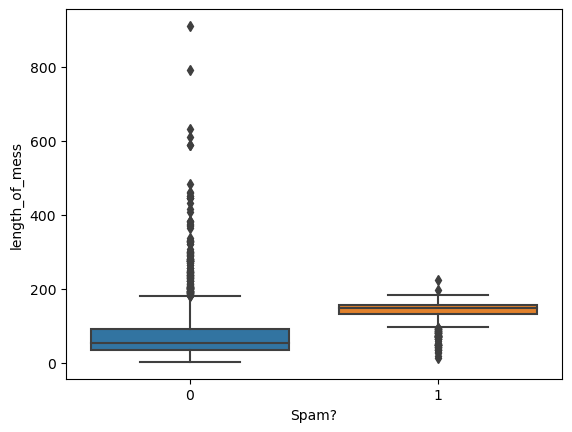

In [141]:
sns.boxplot(data=spam_df, y="length_of_mess", x="Spam?")

Number of Messages Talking About Winner vs. Number of Messages with Random Characters – Boxplot & Scatterplot

<AxesSubplot:xlabel='num_winner', ylabel='num_rand_letters'>

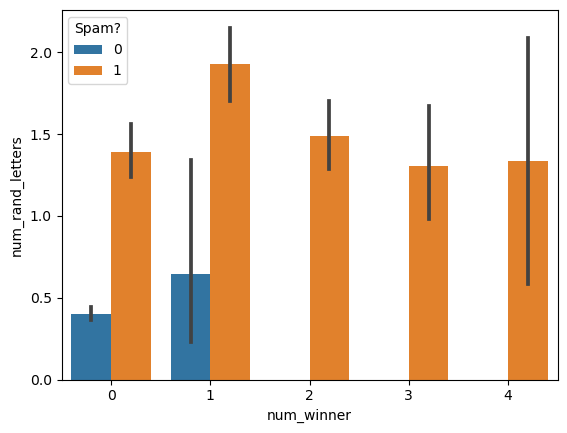

In [142]:
sns.barplot(data=spam_df, x="num_winner", y="num_rand_letters", hue="Spam?")

<AxesSubplot:xlabel='num_winner', ylabel='num_rand_letters'>

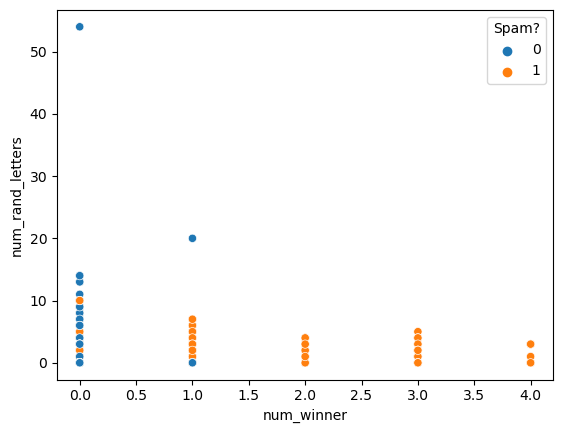

In [143]:
sns.scatterplot(data=spam_df, x="num_winner", y="num_rand_letters", hue="Spam?")

Number of Messages Referencing MSG/Message/etc. vs. Number of Messages with a Website – Boxplot & Scatterplot

<AxesSubplot:xlabel='num_phone_related', ylabel='num_of_website'>

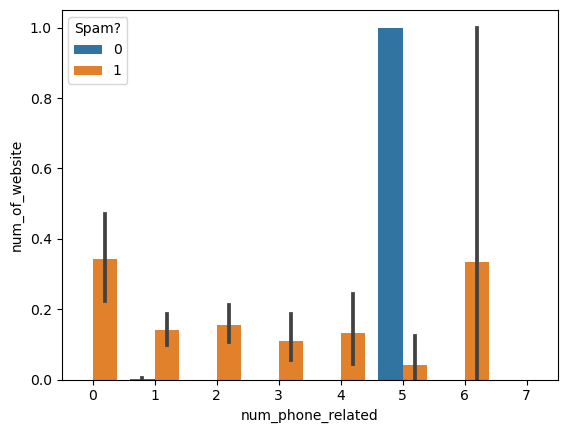

In [144]:
sns.barplot(data=spam_df, x="num_phone_related", y="num_of_website", hue="Spam?")

<AxesSubplot:xlabel='num_phone_related', ylabel='num_of_website'>

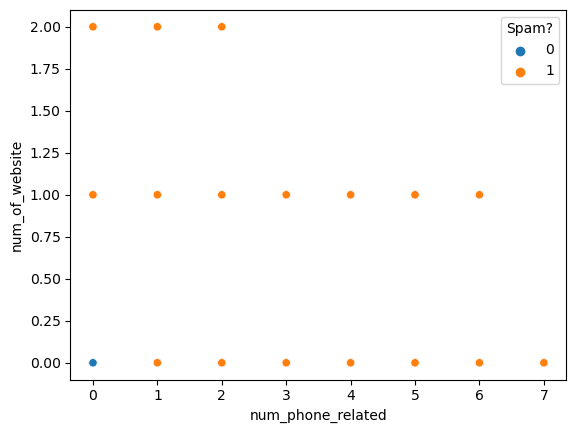

In [145]:
sns.scatterplot(data=spam_df, x="num_phone_related", y="num_of_website", hue="Spam?")

Spam Word vs Ham Word Counts

<AxesSubplot:xlabel='spam_word_count', ylabel='ham_word_count'>

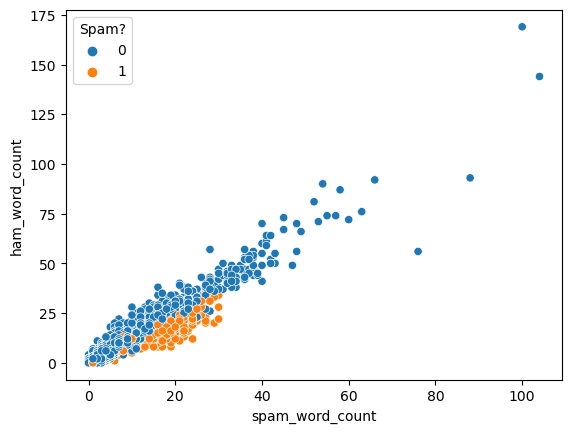

In [146]:
sns.scatterplot(data=spam_df, x="spam_word_count", y="ham_word_count", hue="Spam?")

Trial One: Website

In [154]:
X = spam_df.loc[:, spam_df.columns != 'Spam?']
y = spam_df.loc[:, spam_df.columns == 'Spam?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
columns = X_train.columns

Trial Two: Creating the Training Datasets 

In [147]:
num_spam = spam_df["spam_word_count"]
num_ham = spam_df["ham_word_count"]
X_train = []
y_train = []
i = 0 
while i < len(num_spam):
    X_train.append([float(num_spam[i]), float(num_ham[i])])
    y_train.append(float(spam_df["Spam?"][i]))
    i = i + 1
y_train = np.array(y_train)
X_train = np.array(X_train)

print("First Five X Values: \n", X_train[:5])
print("First Five Y Values: \n", y_train[:5])

First Five X Values: 
 [[17. 20.]
 [ 3.  6.]
 [19. 16.]
 [ 8.  8.]
 [ 7.  9.]]
First Five Y Values: 
 [0. 0. 1. 0. 0.]


Sigmoid Function

In [108]:
def sigmoid(x):
    val = 1 / (1 + math.e**(-x))
    return val


Testing Values for Sigmoid Function

In [109]:
print("Input = 0, Output = ", sigmoid(0))
print("Input = 0.5, Output = ", sigmoid(0.5))
print("Input = 1, Output = ", sigmoid(1))
print("Input = [0.25, 6, 12.3], Output = ", sigmoid(np.array([0.25, 6, 12.3])))

Input = 0, Output =  0.5
Input = 0.5, Output =  0.6224593312018546
Input = 1, Output =  0.7310585786300049
Input = [0.25, 6, 12.3], Output =  [0.5621765  0.99752738 0.99999545]


Computing Cost

In [128]:
def cost(X_arr, y_arr, w, b):
    y_arr = np.array(y_arr)
    m, n = X_arr.shape
    total_loss = 0
    for row in range(m):
        f_val = 0
        z_val = 0
        for col in range(n):
            z_val = z_val + (w[col] * X_arr[row][col])
        z_val = z_val + b
        f_val = sigmoid(z_val)

        loss_val = -y_arr[row] * np.log(f_val) - ((1-y_arr[row]) * np.log(1-f_val))
        total_loss = total_loss + loss_val
    return total_loss/m
        
        

Testing Cost Function with Zeros

In [129]:
print(cost(X_train, y_train, np.array([0., 0.]), 0.))

0.6931471805600047


Gradient (Logistic Regression)

In [130]:
def gradient(X_arr, y_arr, w, b, *argv):
    m, n = X_arr.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.
    for row in range(m):
        z = 0
        for col in range(n):
            z = z + (w[col] * X_arr[row][col])
        z = z + b
        f = sigmoid(z)
        
        for col in range(len(w.shape)):
            dj_dw[col] = dj_dw[col] + ((f - y_arr[row]) * X_arr[row][col])
            
        dj_db = dj_db + f - y_arr[row]
    dj_dw = dj_dw / len(X_arr)
    dj_db = dj_db / len(w.shape)
    return dj_dw, dj_db

In [131]:
dj_dw, dj_db = gradient(X_train, y_train, np.array([0., 0.]), 0.)
dj_dw

array([2.61486001, 0.        ])

Gradient Descent

In [132]:
def gradient_descent(X, y, w, b, alpha, iterations, lambda_):
    cost_history = []
    w_history = []
    
    for i in range(iterations):
        dj_db, dj_dw = gradient(X, y, w, b, lambda_)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i < 100000:
            cost_val = cost(X, y, w, b)
            cost_history.append(cost_val)
        if i%math.ceil(iterations/10) == 0 or i == (iterations-1):
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(cost_history[-1]):8.2f}   ")
        
    return w, b, cost_history, w_history

Test Gradient Descent

In [133]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

iterations = 10000
alpha = 0.001

w,b, cost_history,_ = gradient_descent(X_train, y_train, initial_w, initial_b, alpha, iterations, 0)

/var/folders/t9/jkdln0dj4z1d48j56btqnp780000gn/T/ipykernel_80634/2267037813.py:13: RuntimeWarning: divide by zero encountered in log
  loss_val = -y_arr[row] * np.log(f_val) - ((1-y_arr[row]) * np.log(1-f_val))
/var/folders/t9/jkdln0dj4z1d48j56btqnp780000gn/T/ipykernel_80634/2267037813.py:13: RuntimeWarning: invalid value encountered in multiply
  loss_val = -y_arr[row] * np.log(f_val) - ((1-y_arr[row]) * np.log(1-f_val))


TypeError: only size-1 arrays can be converted to Python scalars